In [1]:
import pandas as pd

import seaborn as sns
sns.set(style='white', color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
iris = pd.read_csv("Iris.csv")

# Data Visualization

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

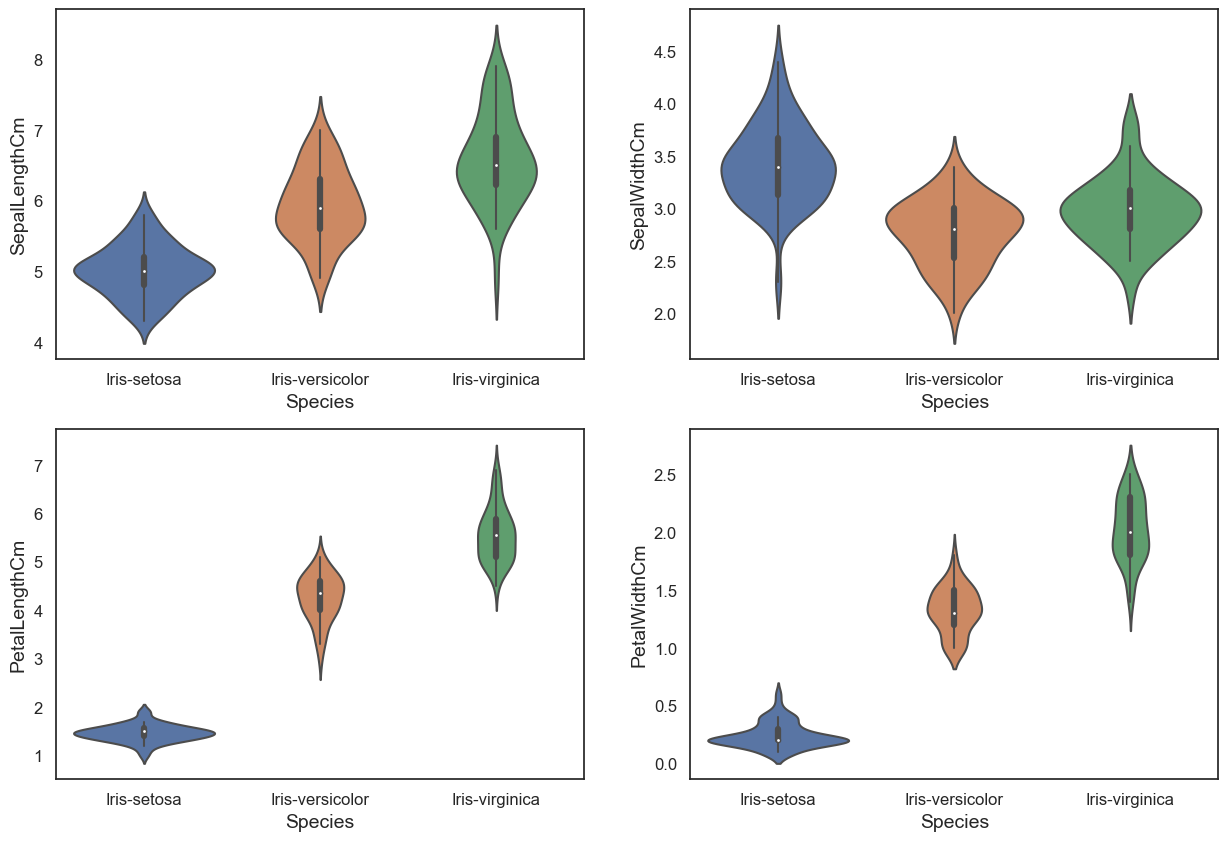

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

<AxesSubplot:>

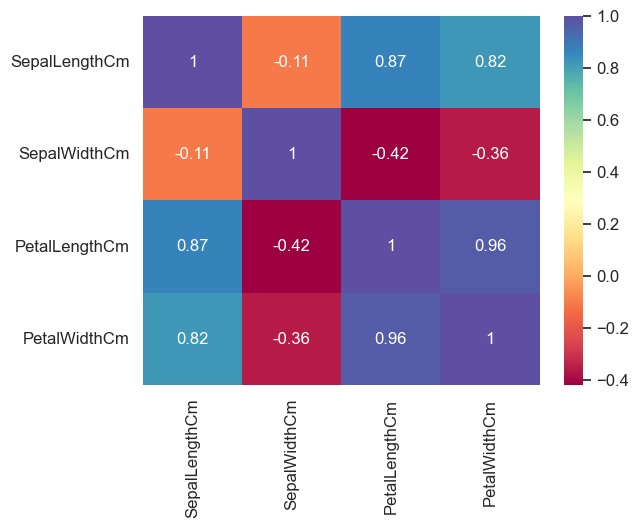

In [6]:
sns.heatmap(iris.drop('Id', axis=1).corr(), annot=True, cmap="Spectral")

### Observation: 
It can be observed that the 'SepalLengthCm' & 'SepalWidthCm' are not correlated while the 'PetalLengthCm' & 'PetalWidthCm' are highly correlated with each other. 
<br>
Thus we will continue with only two features <b><i>'PetalLengthCm'</i></b> and <b><i>'PetalWidthCm'</i></b>

In [7]:
iris.drop(['Id', 'SepalLengthCm', 'SepalWidthCm'], axis=1, inplace=True)

In [8]:
iris.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


# Preparing Training and Test Case

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(iris, iris['Species']):
    iris_train = iris.loc[train_idx]
    iris_test = iris.loc[test_idx]

iris_train.head()

,PetalLengthCm,PetalWidthCm,Species
8,1.4,0.2,Iris-setosa
106,4.5,1.7,Iris-virginica
76,4.8,1.4,Iris-versicolor
9,1.5,0.1,Iris-setosa
89,4.0,1.3,Iris-versicolor


In [10]:
X_train = iris_train[['PetalLengthCm', 'PetalWidthCm']]
X_test = iris_test[['PetalLengthCm', 'PetalWidthCm']]
Y_train = iris_train.Species
Y_test = iris_test.Species

# Training Model

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [12]:
Y_pred = log_reg.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(accuracy_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='macro'))

0.9666666666666667
0.9665831244778613


<b>

The model is quite Accurate!!!